<div style="text-align: center;"> <h3>Statistical Theory</h3>
<h5>Formative Assessment 3</h5>
<h5><u>By Romand Lansangan</u></h5>
    </div>
    
---

### Introduction
From personal to professional context, mobile phones have become an integral part of every individual's daily lives from all walks of life—a phenomenon especially true to college students. Understanding how much time they spend their time on their cellphones provides us a summary of the extent to how much college student's lives revolves arount these rectangular boxes. Knowing such insights may prove to be principal on shaping the future courses of actions for the students and the institutions that might concern them. 

In this study, we shall utilize the data set from a study to determine the average time spent on cellphones by male and female college students from Midwestern University. In the said data set, we are presented with 2 columns, one for "Male" and other for "Females." Under the columns are the number of hours they spent talking on their cell phones per week.  
![](table_1.jpg)



A study was undertaken to compare the mean time spent on cell phones by male and female college students per week. Fifty male and 50 female students were selected from Midwestern University and the number of hours per week spent talking on their cell phones determined. The results in hours are shown in Table 10.6. It is desired to test versus based on these samples.


This study aims to examine whether there is a difference in the average time spent on cell phones between male and female college students at Midwestern University. A sample of 50 male and 50 female students was selected, and their weekly cell phone usage in hours was recorded.

The objective is to determine if the observed difference in mean phone usage is statistically significant or if it could have occurred by chance. To this end, a hypothesis test will be conducted to compare the mean time spent on cell phones by male and female students.

In [208]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import levene


Mean difference.

H0: There is no significant difference in the average time spent talking on cellphones per week between boys and girls attending college ($\mu_1=\mu_2$). <br>
H1: There is a significant difference between the average time spent talking on cellphones per week between boys and girls attending college ($\mu_1 \ne \mu_2$).

In [131]:
df = pd.read_csv('data_sa1.csv')
df.head()

,Males,Females
0,12,11
1,7,10
2,7,11
3,10,10
4,8,11


In [190]:
df_males = df['Males'].to_frame()
df_males['Gender'] = "m"

df_females = df['Females'].to_frame()
df_females['Gender'] = "f"

df_males.columns = ['Hours_Spent', 'Gender']
df_females.columns = ['Hours_Spent', 'Gender']

combined_df = pd.concat([df_males, df_females], ignore_index=True)
combined_df

,Hours_Spent,Gender
0,12,m
1,7,m
2,7,m
3,10,m
4,8,m
...,...,...
95,7,f
96,11,f
97,10,f
98,9,f


In [188]:

combined_df[abs(combined_df['z']) > 1.96]

,Hours_Spent,Gender,z
10,4,m,-2.701748
42,15,m,2.404649
82,6,f,-2.083702
93,14,f,2.421599


## Assumption 1
You have one dependent variable that is measured at the continuous level.

## Assumption 2
You have one independent variable that consists of two categorical, independent groups (i.e., a dichotomous variable).

## Assumption 3
You should have independence of observations, which means that there is no relationship between the observations in each group of the independent variable or between the groups themselves.

## Assumption 4
There should be no significant outliers in the two groups of your independent variable in terms of the dependent variable.

In [200]:
mean_males = df_males['Hours_Spent'].mean()
std_males = df_males['Hours_Spent'].std()
df_males['z'] = (df_males['Hours_Spent'] - mean_males)/std_males


mean_females = df_females['Hours_Spent'].mean()
std_females = df_females['Hours_Spent'].std()
df_females['z'] = (df_females['Hours_Spent'] - mean_females)/std_females

combined_df = pd.concat([df_males, df_females], ignore_index=True)
print(combined_df[abs(combined_df['z']) > 2.5])

combined_df_no_outlier = combined_df[abs(combined_df['z']) < 2.5]

    Hours_Spent Gender         z
10            4      m -2.701748


## Assumption 5
Your dependent variable should be approximately normally distributed for each group of the independent variable.

In [213]:
males_only_series = combined_df_no_outlier[combined_df_no_outlier['Gender']=='m']['Hours_Spent']
females_only_series = combined_df_no_outlier[combined_df_no_outlier['Gender']=='f']['Hours_Spent']

stats_mal, p_value_mal = shapiro(males_only_series)
stats_fem, p_value_fem = shapiro(females_only_series)
print(p_value_mal)
print(p_value_fem)

0.15885169453713505
0.12919719507959687


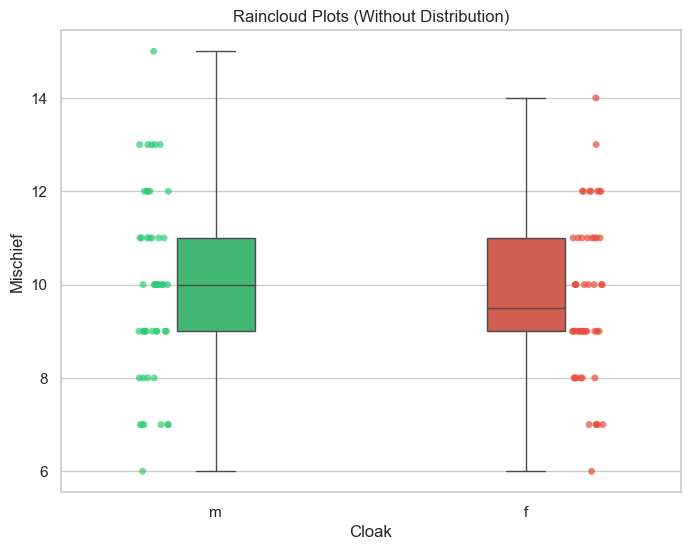

In [206]:
np.random.seed(42)
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.stripplot(x="Gender", y="Hours_Spent", data=combined_df_no_outlier, jitter=True, dodge=True, 
              hue="Gender", palette=["#2ECC71", "#E74C3C"], alpha=0.7, zorder=1, legend=False)

sns.boxplot(x="Gender", y="Hours_Spent", data=combined_df_no_outlier, whis=np.inf, fliersize=0, 
            hue="Gender", width=0.25, palette=["#2ECC71", "#E74C3C"], zorder=2, dodge=False, legend=False)

plt.title("Raincloud Plots (Without Distribution)")
plt.ylabel("Mischief")
plt.xlabel("Cloak")
plt.show()


## Assumption 6
You have homogeneity of variances (i.e., the variance of the dependent variable is equal in each group of your independent variable).

In [215]:
levene = levene(females_only_series, males_only_series)
print(levene)

LeveneResult(statistic=0.2444673109043188, pvalue=0.622115990194636)


In [217]:
stats, p_value = ttest_ind(males_only_series, females_only_series)
print(p_value)

0.5316505676186108


In [219]:
def desc_stats(data_series):
    valid = data_series.size
    median = data_series.median()
    mean = data_series.mean()
    mode = data_series.mode()
    std = data_series.std()
    var = data_series.var()
    skew = data_series.skew()
    stdSkew = (((6 * valid * (valid - 1)) / ((valid - 2) * (valid + 1) * (valid + 3)))**0.5)
    kurt = data_series.kurt()
    stdKurt = (((24 * valid * (valid - 1)**2) / ((valid - 2) * (valid - 3) * (valid + 3) * (valid + 5)))**0.5)
    min_val = data_series.min()
    max_val = data_series.max()
    percentiles = [0.25, 0.50, 0.75, 0.90, 0.95]
    quartiles_list = data_series.quantile(percentiles)
    return {
            'valid_count': valid,
            'median': median,
            'mean': mean,
            'mode': mode.values if not mode.empty else None,
            'std': std,
            'variance': var,
            'skewness': skew,
            'std_skew': stdSkew,
            'kurtosis': kurt,
            'std_kurtosis': stdKurt,
            'min': min_val,
            'max': max_val,
            'percentiles': quartiles_list.to_dict()
        }

In [221]:
desc_stats(males_only_series)

{'valid_count': 49,
 'median': 10.0,
 'mean': 9.938775510204081,
 'mode': array([ 9, 10], dtype=int64),
 'std': 2.004247191022377,
 'variance': 4.017006802721089,
 'skewness': 0.20078472297241773,
 'std_skew': 0.33982762550634865,
 'kurtosis': -0.34861104168125223,
 'std_kurtosis': 0.6680646648017314,
 'min': 6,
 'max': 15,
 'percentiles': {0.25: 9.0, 0.5: 10.0, 0.75: 11.0, 0.9: 13.0, 0.95: 13.0}}

In [223]:
desc_stats(females_only_series)

{'valid_count': 50,
 'median': 9.5,
 'mean': 9.7,
 'mode': array([9], dtype=int64),
 'std': 1.7756861278080076,
 'variance': 3.1530612244897958,
 'skewness': 0.13441178337818513,
 'std_skew': 0.33660070854935886,
 'kurtosis': -0.44179202858004274,
 'std_kurtosis': 0.661908374514148,
 'min': 6,
 'max': 14,
 'percentiles': {0.25: 9.0, 0.5: 9.5, 0.75: 11.0, 0.9: 12.0, 0.95: 12.0}}